In [1]:
import pandas as pd
ds = pd.read_csv('insurance.csv')

In [2]:
ds.head(29)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [3]:
x = ds.iloc[:, :-1].values.reshape(-1,1)

In [5]:
y = ds.iloc[:, -1].values.reshape(-1,1)

In [6]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
reg = LogisticRegression()

# fit the model with data
reg.fit(x,y)

#
pred=reg.predict(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [8]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y, pred)
cnf_matrix

array([[11,  2],
       [ 1, 13]], dtype=int64)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

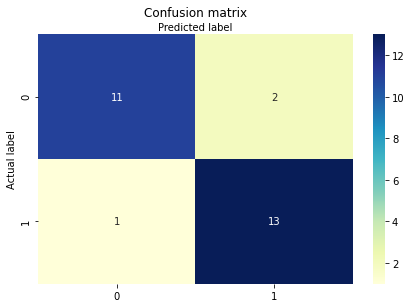

In [10]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [11]:
print("Accuracy:",metrics.accuracy_score(y, pred))
print("Precision:",metrics.precision_score(y, pred))
print("Recall:",metrics.recall_score(y, pred))

Accuracy: 0.8888888888888888
Precision: 0.8666666666666667
Recall: 0.9285714285714286


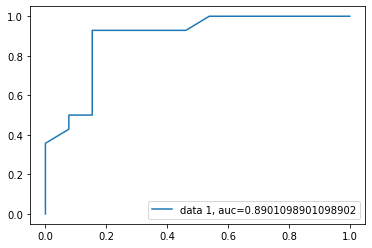

In [13]:
y_pred_proba = reg.predict_proba(x)[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Text(0, 0.5, 'Bought_Insurance')

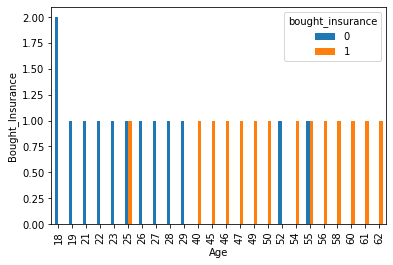

In [21]:
pd.crosstab(ds.age,ds.bought_insurance).plot(kind='bar')

plt.xlabel('Age')
plt.ylabel('Bought_Insurance')
